In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Display matplotlib plots inline with the Jupyter Notebook
%matplotlib inline

In [7]:
# Load the data from a CSV file
file_path = 'pls_fy21_outlet_pud21i.csv'  

    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("Data loaded using ISO-8859-1 encoding.")

        data = pd.read_csv(file_path, encoding='cp1252')
        print("Data loaded using cp1252 encoding.")
    
# display the first few rows to verify
if 'data' in locals():
    print(data.head())

Data loaded using ISO-8859-1 encoding.
  STABR FSCSKEY  FSCS_SEQ C_FSCS       LIBID  \
0    AK  AK0001         2      Y  AK0001-002   
1    AK  AK0002         7      Y  AK0002-007   
2    AK  AK0002         8      Y  AK0002-008   
3    AK  AK0002        10      Y  AK0002-010   
4    AK  AK0002        11      Y  AK0002-011   

                            LIBNAME                        ADDRESS  \
0       ANCHOR POINT PUBLIC LIBRARY          34020 NORTH FORK ROAD   
1       CHUGIAK-EAGLE RIVER LIBRARY  12001 BUSINESS BOULEVARD #176   
2                   MULDOON LIBRARY   1251 MULDOON ROAD, SUITE 158   
3  SCOTT AND WESLEY GERRISH LIBRARY               250 EGLOFF DRIVE   
4             Z. J. LOUSSAC LIBRARY             3600 DENALI STREET   

           CITY    ZIP  ZIP4  ... CENTRACT  CENBLOCK CDCODE   CBSA MICROF  \
0  ANCHOR POINT  99556  9150  ...     8.00      3027    200     -4      N   
1   EAGLE RIVER  99577  7743  ...     2.01      2000    200  11260      0   
2     ANCHORAGE  995

In [8]:
# Data Cleaning
# Checking for missing values
print(data.isnull().sum())


STABR        0
FSCSKEY      0
FSCS_SEQ     0
C_FSCS       0
LIBID        0
LIBNAME      0
ADDRESS      0
CITY         0
ZIP          0
ZIP4         0
CNTY         0
PHONE        0
C_OUT_TY     0
SQ_FEET      0
F_SQ_FT      0
L_NUM_BM     0
HOURS        0
F_HOURS      0
WKS_OPEN     0
F_WKSOPN     0
YR_SUB       0
OBEREG       0
STATSTRU     0
STATNAME     0
STATADDR     0
LONGITUD     0
LATITUDE     0
INCITSST     0
INCITSCO     0
GNISPLAC     0
CNTYPOP      0
LOCALE       0
CENTRACT     0
CENBLOCK     0
CDCODE       0
CBSA         0
MICROF       0
GEOSTATUS    0
GEOSCORE     0
GEOMTYPE     0
C19WKSCL     0
C19WKSLO     0
dtype: int64


In [10]:
# 'data' is your DataFrame
print("Data types before conversion:")
print(data.dtypes)  # This will show the current data types of all columns

# Convert columns that should be numeric but are object types
numeric_columns = ['HOURS', 'SQ_FEET', 'CNTYPOP']  # List columns that should be numeric
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # 'coerce' will set errors to NaN

print("\nData types after attempted conversion:")
print(data.dtypes)  # Check if the types have changed as expected

# Check for non-numeric values that couldn't be converted
print("\nNon-numeric entries after conversion attempt:")
for col in numeric_columns:
    non_numeric = data[pd.to_numeric(data[col], errors='coerce').isna()]
    if not non_numeric.empty:
        print(f"Column '{col}' contains non-numeric data:")
        print(non_numeric[col].unique())

Data types before conversion:
STABR         object
FSCSKEY       object
FSCS_SEQ       int64
C_FSCS        object
LIBID         object
LIBNAME       object
ADDRESS       object
CITY          object
ZIP            int64
ZIP4          object
CNTY          object
PHONE          int64
C_OUT_TY      object
SQ_FEET        int64
F_SQ_FT       object
L_NUM_BM       int64
HOURS          int64
F_HOURS       object
WKS_OPEN       int64
F_WKSOPN      object
YR_SUB         int64
OBEREG         int64
STATSTRU       int64
STATNAME       int64
STATADDR       int64
LONGITUD     float64
LATITUDE     float64
INCITSST       int64
INCITSCO       int64
GNISPLAC      object
CNTYPOP        int64
LOCALE         int64
CENTRACT     float64
CENBLOCK       int64
CDCODE         int64
CBSA           int64
MICROF        object
GEOSTATUS     object
GEOSCORE     float64
GEOMTYPE      object
C19WKSCL       int64
C19WKSLO       int64
dtype: object

Data types after attempted conversion:
STABR         object
FSCSKEY      

In [11]:
# Data Exploration
# Describe data to get basic statistical details
print(data.describe())

           FSCS_SEQ           ZIP         PHONE        SQ_FEET      L_NUM_BM  \
count  17426.000000  17426.000000  1.742600e+04   17426.000000  17426.000000   
mean       7.749971  48942.217089  5.670397e+09   12315.478940      0.029094   
std       19.887421  28692.503786  2.386492e+09   25412.900824      0.293228   
min        1.000000    802.000000 -4.000000e+00      -4.000000     -3.000000   
25%        2.000000  25506.500000  3.342336e+09    2500.000000      0.000000   
50%        2.000000  48836.500000  5.854288e+09    6300.000000      0.000000   
75%        7.000000  71859.250000  7.812370e+09   14200.000000      0.000000   
max      427.000000  99950.000000  9.899834e+09  970000.000000     16.000000   

              HOURS      WKS_OPEN   YR_SUB        OBEREG      STATSTRU  ...  \
count  17426.000000  17426.000000  17426.0  17426.000000  17426.000000  ...   
mean    1592.885344     39.267589   2022.0      4.286870      0.561001  ...   
std      936.251355     17.313030      0.0

In [12]:
# Analysis
# Analyzing library services by county
library_by_county = data.groupby('CNTY')['LIBNAME'].count()
print(library_by_county)

CNTY
ABBEVILLE         3
ACADIA            7
ACCOMACK          2
ADA              18
ADAIR             9
                 ..
YOUNG             2
YUBA              1
YUKON-KOYUKUK    11
YUMA             11
ZAPATA            1
Name: LIBNAME, Length: 1813, dtype: int64


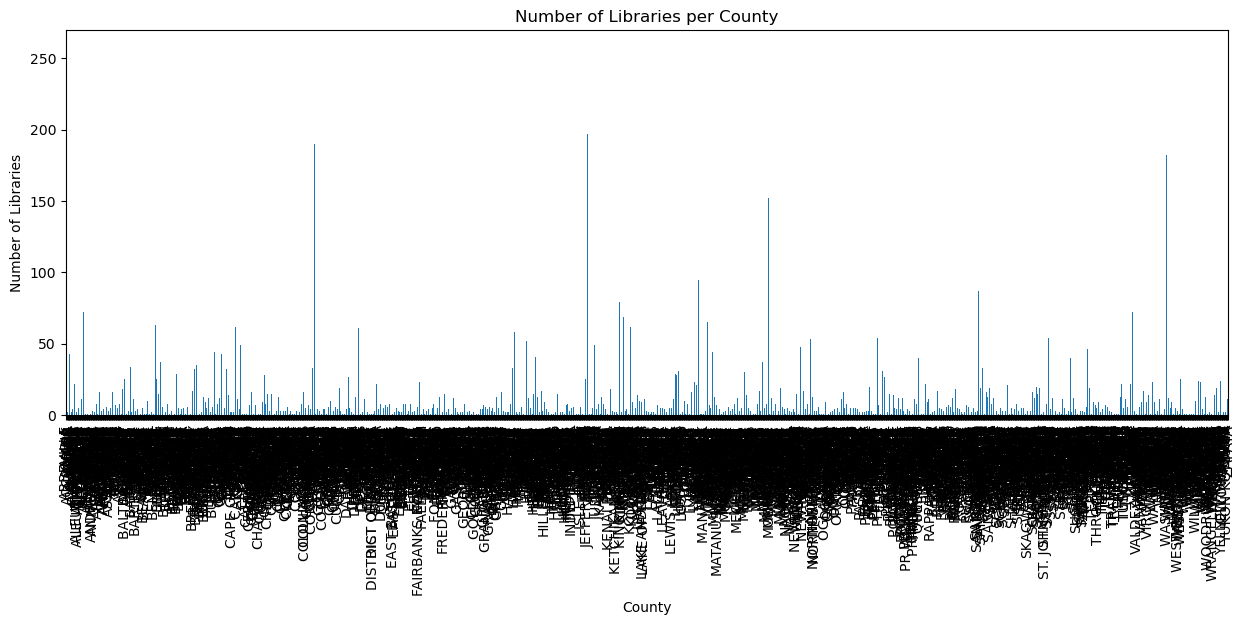

In [15]:
 #Visualization
# Plotting the number of libraries per county
plt.figure(figsize=(15, 5))
library_by_county.plot(kind='bar')
plt.title('Number of Libraries per County')
plt.xlabel('County')
plt.ylabel('Number of Libraries')
plt.show()